In [130]:
import pandas as pd
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [131]:
df = pd.read_excel('中间数据集\\表1与表2拼接后的数据集.xlsx')
df = df.drop(['文物编号', '采样位置', '风化具体情况', '纹饰', '表面风化', '颜色'], axis=1)

labelencoder = LabelEncoder()
df['类型'] = labelencoder.fit_transform(df['类型'])
df.head()

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,0,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,1,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,1,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [132]:
# 编码对应关系
labelencoder.classes_

array(['铅钡', '高钾'], dtype=object)

In [133]:
X_valid = pd.read_excel("中间数据集\\经过清洗的数据集3.xlsx").drop(["文物编号", "表面风化"], axis=1)
X_valid.head()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51
1,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00
2,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00
3,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00
4,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00


In [134]:
X = df.drop("类型", axis=1)
y = df["类型"]

# 划分数据集：将整个数据集按行（样本）划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ***建立模型、测试模型***

In [135]:
import lightgbm as lgb


# 第一步：初始化模型
LGB = lgb.LGBMClassifier(learning_rate=0.1)

# 第二步：用训练集拟合模型
LGB.fit(X_train, y_train)

# 第三步：用模型进行预测
y_pred = LGB.predict(X_test)

[LightGBM] [Info] Number of positive: 12, number of negative: 41
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 53, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226415 -> initscore=-1.228665
[LightGBM] [Info] Start training from score -1.228665
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


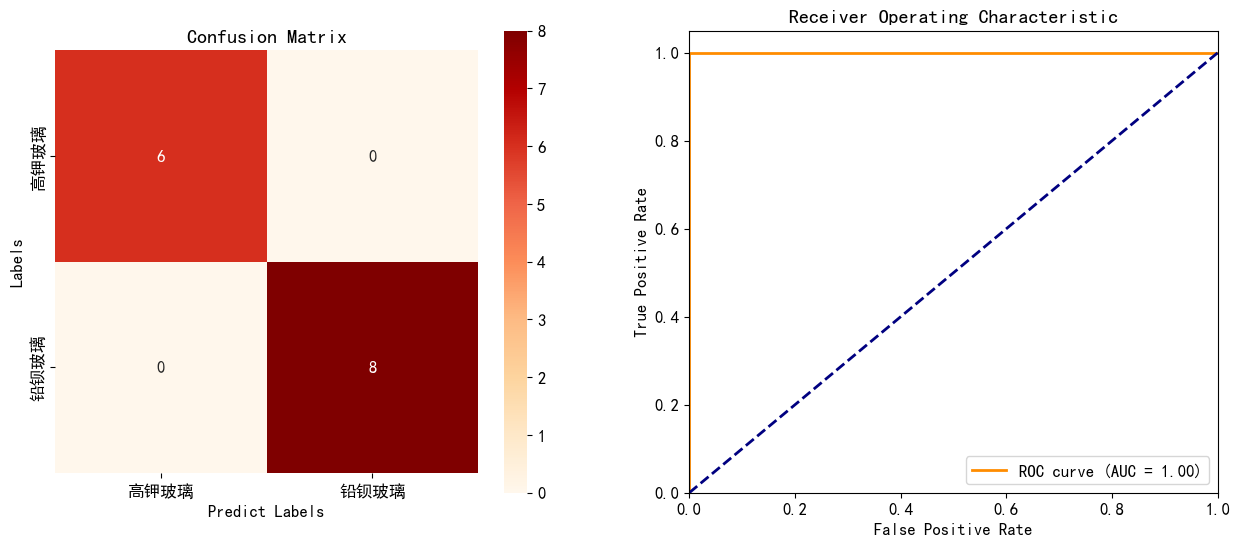

In [136]:
from sklearn.metrics import auc, confusion_matrix
from sklearn import metrics

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat = confusion_matrix(y_test, y_pred, labels=[1, 0])

# 计算AUC和ROC曲线下的面积(AUC value)和横坐标为fpr,纵坐标为tpr的点
auc_value = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc_point = auc(fpr, tpr)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.heatmap(mat, annot=True, square="equal", cmap="OrRd", ax=ax[0],
    xticklabels=['高钾玻璃', '铅钡玻璃'], 
    yticklabels=['高钾玻璃', '铅钡玻璃'])
ax[0].set_xlabel("Predict Labels")
ax[0].set_ylabel("Labels")
ax[0].set_title("Confusion Matrix")

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_point)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

fig.savefig("图片\\10_简单预测的分类器测试结果可视化.eps")

## ***求解与预测***

In [137]:
# 完成未知样本的预测并反标签化
y_valid = LGB.predict(X_valid)
predict_result = labelencoder.inverse_transform(y_valid)

# 将结果以DataFrame形式输出
predict_result = pd.DataFrame(predict_result.T)
predict_result['ID'] = (pd.read_excel("中间数据集\\经过清洗的数据集3.xlsx"))['文物编号']
predict_result.columns = ['预测结果', '文物编号']
predict_result = predict_result[['文物编号', '预测结果']]

In [138]:
predict_result.to_excel('结果\\3_第三题预测结果.xlsx', index=False)

## ***敏感性分析***

Text(0, 0.5, 'Accuracy')

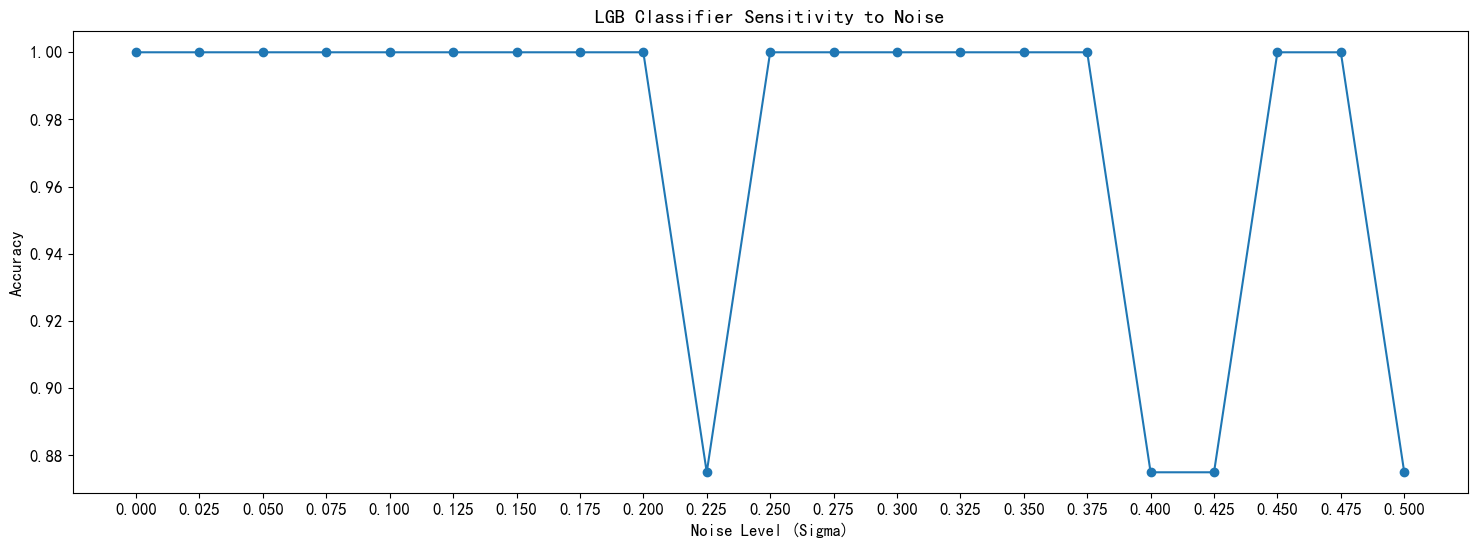

In [139]:
import numpy as np
from sklearn.metrics import accuracy_score


def add_noise(X, sigma):  
    """在特征X上添加高斯噪声"""  
    return X * (1 + sigma * np.random.randn(*X.shape))

# 定义一个sigma值的范围  
sigmas = np.linspace(0, 0.5, 21)  # 假设我们测试从0到0.5的20个sigma值  
accuracies = []  

for sigma in sigmas:  
    X_valid_noisy = add_noise(X_valid, sigma)  
    predictions = LGB.predict(X_valid_noisy)  
    # 若为分类模型，使用accuracy_score，若为回归模型，使用MAE
    accuracy = accuracy_score(y_valid, predictions)
    accuracies.append(accuracy)


fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(sigmas, accuracies, marker='o')  
ax.set_title('LGB Classifier Sensitivity to Noise')  
ax.set_xticks(sigmas)
ax.set_xlabel('Noise Level (Sigma)')  
ax.set_ylabel('Accuracy')  


## ***模型推广部分***

In [140]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


# 初始化分类器
svc = SVC(kernel='linear', probability=True)
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()

# 创建VotingClassifier，设置voting为'soft'表示使用概率平均
eclf = VotingClassifier(estimators=[
    ('svc', svc), 
    ('dtc', dtc), 
    ('gnb', gnb), 
    ('knn', knn), 
    ('lr', lr)], 
    voting='soft')

# 训练模型
predictions = []
for model in [svc, dtc, gnb, knn, lr, eclf]:
    y_pred = model.fit(X_train, y_train).predict(X_test)
    predictions.append(y_pred)
    print(accuracy_score(y_test, y_pred))

1.0
1.0
0.7857142857142857
1.0
1.0
1.0


Text(0, 0.5, 'Accuracy')

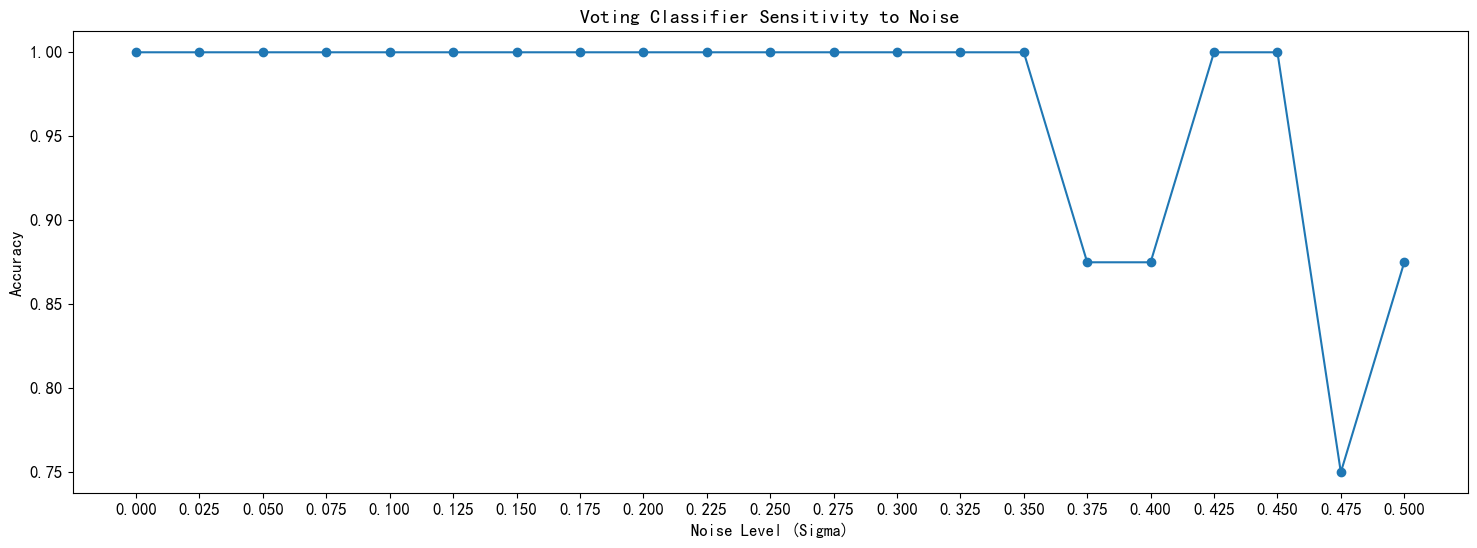

In [141]:
import numpy as np
from sklearn.metrics import accuracy_score


def add_noise(X, sigma):  
    """在特征X上添加高斯噪声"""  
    return X * (1 + sigma * np.random.randn(*X.shape))

# 定义一个sigma值的范围  
sigmas = np.linspace(0, 0.5, 21)  # 假设我们测试从0到0.5的20个sigma值  
accuracies = []  

for sigma in sigmas:  
    X_valid_noisy = add_noise(X_valid, sigma)  
    predictions = eclf.predict(X_valid_noisy)  
    # 若为分类模型，使用accuracy_score，若为回归模型，使用MAE
    accuracy = accuracy_score(y_valid, predictions)
    accuracies.append(accuracy)


fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(sigmas, accuracies, marker='o')  
ax.set_title('Voting Classifier Sensitivity to Noise')  
ax.set_xticks(sigmas)
ax.set_xlabel('Noise Level (Sigma)')  
ax.set_ylabel('Accuracy')  